# Does the director affect the gross outcome or does the budget?

In [3]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key

pd.options.display.float_format = "{:,.2f}".format

allmovies_df = pd.read_csv("allmoviesdata.csv")
allmovies_df["Director"]=allmovies_df["Director"].astype('string')
allmovies_df

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,0,48,Black Panther,200.00,700.06,"1,336.49",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,300.00,678.82,"2,048.36",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,200.00,608.58,"1,242.81",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,170.00,417.72,"1,308.32",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,275.00,213.77,393.15,Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,4.00,38.25,38.25,Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,25.00,54.61,119.30,Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
218,206,44,King Kong,207.00,218.08,550.52,Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
219,207,445,Midway,100.00,56.85,126.82,History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


### Director Statistical Analysis

In [4]:
directors_df = allmovies_df
directors_df = directors_df.drop(["Movie ID", "Rank", "Title", "Main Genre", "2nd Genre", "3rd Genre", "IMDB Rating", 
                                    "Studio", "Year","IMDb ID"],axis=1, inplace = False)
directorsagg = directors_df.groupby("Director").agg(['mean','median','var','std','sem'])["Production Budget"]
directorsagg

,mean,median,var,std,sem
Director,,,,,
Adrian Lyne,7.00,7.00,NaN,NaN,NaN
Alan J. Pakula,45.00,45.00,NaN,NaN,NaN
Alan Taylor,150.00,150.00,NaN,NaN,NaN
Alfonso Cuarón,120.00,120.00,200.00,14.14,10.00
Andrew Adamson,225.00,225.00,NaN,NaN,NaN
...,...,...,...,...,...
Tony Scott,17.50,17.50,12.50,3.54,2.50
"Warren Beatty, Buck Henry",15.00,15.00,NaN,NaN,NaN
Wolfgang Petersen,102.50,102.50,612.50,24.75,17.50


There is not enough information for a complete statistical analysis on each director in the the data. From here on the focus will be one the mean on of the each directors budget.

### Director Average Budget and Gross Outcome Dataframes 

In [5]:
#Creating a dataframe of directors, total number of movies, their mean budget, and mean gross outcome for them based on the dataset provided above

#Grouping by director 
##Finding the number of movies each director in the data has made 
moviecount = allmovies_df.groupby(["Director"]).count()[("Title")]
#finding averages for each director
avgbudget = allmovies_df.groupby(["Director"]).mean()[("Production Budget")]
avgdomestic = allmovies_df.groupby(["Director"]).mean()["Domestic Gross"]
avgworldwide = allmovies_df.groupby(["Director"]).mean()["Worldwide Gross"]

#Dataframe created based on groupby and converting millions to 0.0 million
avgdirectors_df = pd.DataFrame({"Number of Movies":moviecount,
                            "Average Budget": (avgbudget),
                            "Average Domestic Gross": (avgdomestic),
                            "Average Worldwide Gross": (avgworldwide)})

#Ensuring data type stays as float
avgdirectors_df["Average Budget"] = avgdirectors_df["Average Budget"].astype(float)
avgdirectors_df["Average Domestic Gross"] = avgdirectors_df["Average Domestic Gross"].astype(float)
avgdirectors_df["Average Worldwide Gross"] = avgdirectors_df["Average Worldwide Gross"].astype(float)

avgdirectors_df


,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Adrian Lyne,1,7.00,90.46,201.46
Alan J. Pakula,1,45.00,100.77,188.00
Alan Taylor,1,150.00,206.36,644.60
Alfonso Cuarón,2,120.00,261.93,738.90
Andrew Adamson,1,225.00,141.62,417.34
...,...,...,...,...
Tony Scott,2,17.50,167.07,317.07
"Warren Beatty, Buck Henry",1,15.00,98.80,98.80
Wolfgang Petersen,2,102.50,177.79,321.99


##### Directors in order of the number of movies they have completed

In [6]:
#Dataframe of top directors based on the number of movies that they made
moviedirect_df = avgdirectors_df.sort_values("Number of Movies", ascending=False)
moviedirect_df.to_csv("datacreatedcsv/moviecountdirector.csv", index_label="Movie ID")
moviedirect10_df = moviedirect_df.head(10)
moviedirect_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Steven Spielberg,8,68.19,244.13,568.24
Michael Bay,8,157.81,248.99,673.23
Richard Donner,5,54.00,105.84,228.96
Zack Snyder,4,212.00,265.26,662.63
Roland Emmerich,4,140.00,214.92,665.00
...,...,...,...,...
John Guillermin,1,207.00,218.08,550.52
"Carlos Saldanha, Michael Thurmeier",1,90.00,196.57,886.69
John G. Avildsen,1,40.00,176.59,351.77


##### Directors in order of their average movie budget

In [7]:
#Dataframe of top directors based the average budget
budgdirect_df = avgdirectors_df.sort_values("Average Budget", ascending=False)
budgdirect_df.to_csv("datacreatedcsv/avgdirectorbudget.csv", index_label="Movie ID")
budgdirect10_df = budgdirect_df.head(10)
budgdirect_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Rob Marshall,1,379.00,241.07,"1,045.71"
Joss Whedon,2,295.00,541.18,"1,455.21"
"Roger Allers, Rob Minkoff",1,260.00,543.64,"1,647.73"
"Nathan Greno, Byron Howard",1,260.00,200.82,583.78
"Anthony Russo, Joe Russo",3,240.00,448.88,"1,304.89"
...,...,...,...,...
Hugh Hudson,1,5.50,61.56,61.91
Blake Edwards,1,5.00,41.83,41.83
Randal Kleiser,1,4.50,47.92,47.92


### Director Average Bar Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Steven Spielberg'),
  Text(1, 0, 'Michael Bay'),
  Text(2, 0, 'Richard Donner'),
  Text(3, 0, 'Zack Snyder'),
  Text(4, 0, 'Roland Emmerich'),
  Text(5, 0, 'Robert Zemeckis'),
  Text(6, 0, 'Tim Burton'),
  Text(7, 0, 'Chris Columbus'),
  Text(8, 0, 'Ron Howard'),
  Text(9, 0, 'James Cameron')])

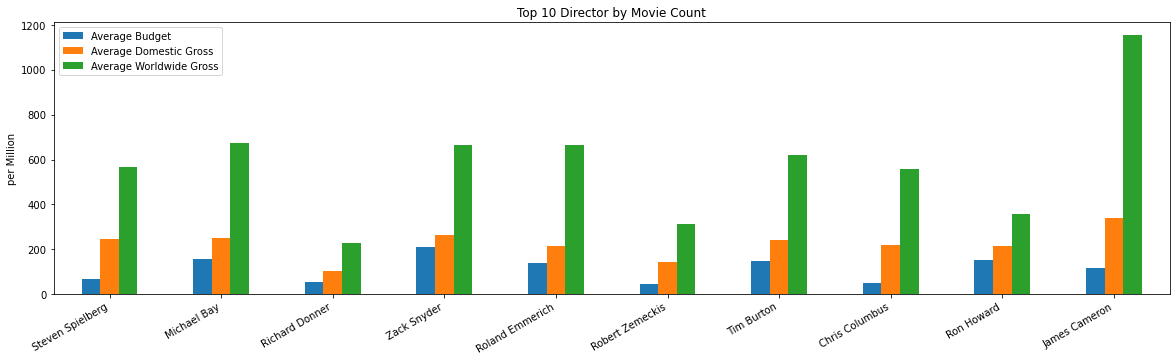

In [8]:
#Bar Chart showing top ten directors by movie count, and their average budget to gross outcome
moviedirect10_df = moviedirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
moviecountbar = moviedirect10_df.plot.bar(xlabel = "",ylabel="per Million", 
             title = "Top 10 Director by Movie Count", figsize=(20,5),)
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rob Marshall'),
  Text(1, 0, 'Joss Whedon'),
  Text(2, 0, 'Roger Allers, Rob Minkoff'),
  Text(3, 0, 'Nathan Greno, Byron Howard'),
  Text(4, 0, 'Anthony Russo, Joe Russo'),
  Text(5, 0, 'Andrew Adamson'),
  Text(6, 0, 'Barry Sonnenfeld'),
  Text(7, 0, 'Colin Trevorrow'),
  Text(8, 0, 'Zack Snyder'),
  Text(9, 0, 'Marc Webb')])

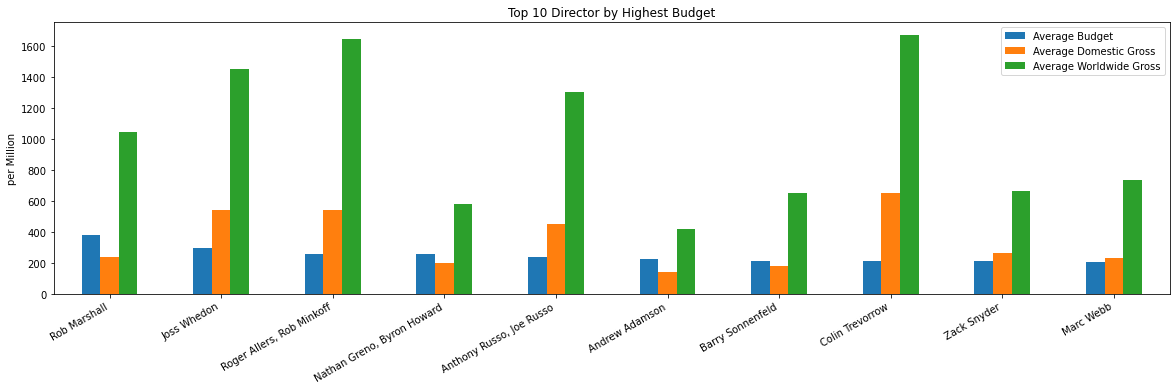

In [9]:
#Bar Chart showing top ten directors by average budget, and showing their average budget to gross outcome
budgdirect10_df = budgdirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
budgetbar = budgdirect10_df.plot.bar(xlabel = "",ylabel="per Million", 
             title = "Top 10 Director by Highest Budget", figsize=(20,5))
plt.xticks(rotation=30,ha='right')

**Bar Chart Analysis:** It is important to notice that there is no overelay in the directors between these two chart, so this is a good snip it of comparing the high average budget to number of movies made based upon the dataset provided. Overall these charts show that expeience does not equat to higher gross outcome, but budget does. This helps to back the thought that higher budget means higher gross outcome.

### Director Percent Increase Line Charts

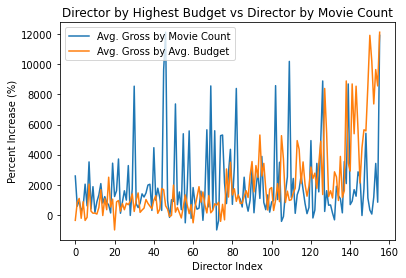

In [10]:
#percent increase = (Gross income - budget)/budget
countdomgross = ((moviedirect_df["Average Domestic Gross"]-moviedirect_df["Average Budget"])/moviedirect_df["Average Budget"])*1000
budgetdomgross = ((budgdirect_df["Average Domestic Gross"]-budgdirect_df["Average Budget"])/budgdirect_df["Average Budget"])*1000

#Creating a dataframe for domestic gross income
perdomincrease = pd.DataFrame(zip(countdomgross,budgetdomgross))
perdomincrease.to_csv("datacreatedcsv/perdomincrease.csv", index_label="Director ID")
perdomincrease = pd.read_csv("datacreatedcsv/perdomincrease.csv")
perdomincrease = perdomincrease.rename(columns={"0":"Avg. Gross by Movie Count","1":"Avg. Gross by Avg. Budget"})

#Line chart for percent increase going from 0 (director with highest number of movie and highest average budget)
#160 (to lowest number of movies and lowest average budget)
perdomincrease = perdomincrease.drop(["Director ID"], axis=1, inplace = False)
domline = perdomincrease.plot.line(xlabel="Director Index", ylabel="Percent Increase (%)", 
            title = "Director by Highest Budget vs Director by Movie Count")


**Domestic Line Chart Anlysis:** For Average Percent Gross by Movie Count there seems to be no consistancy between the number of movies the direct has done and the percent gross. By comparison there is a noticable correlation between the average budget and the percent gross change.  

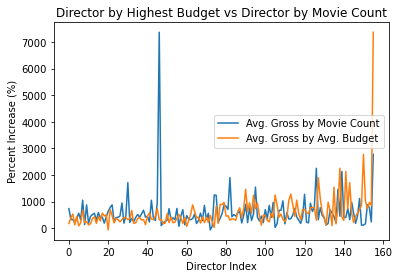

In [11]:
#percent increase = (Gross income - budget)/budget
countworldgross = ((moviedirect_df["Average Worldwide Gross"]-moviedirect_df["Average Budget"])/moviedirect_df["Average Budget"])*100
budgetworldgross = ((budgdirect_df["Average Worldwide Gross"]-budgdirect_df["Average Budget"])/budgdirect_df["Average Budget"])*100

#Creating a dataframe for Worldwide gross income
perworldincrease = pd.DataFrame(zip(countworldgross,budgetworldgross))
perworldincrease.to_csv("datacreatedcsv/perworldincrease.csv", index_label="Director ID")
perworldincrease = pd.read_csv("datacreatedcsv/perworldincrease.csv")
perworldincrease = perworldincrease.rename(columns={"0":"Avg. Gross by Movie Count","1":"Avg. Gross by Avg. Budget"})

#Line chart for percent increase going from 0 (director with highest number of movie and highest average budget)
#160 (to lowest number of movies and lowest average budget)
perworldincrease = perworldincrease.drop(["Director ID"], axis=1, inplace = False)
worldline = perworldincrease.plot.line(xlabel="Director Index", ylabel="Percent Increase (%)", 
            title = "Director by Highest Budget vs Director by Movie Count")

In [13]:
#Finding the outlier for domestic and worldwide
cattaneo = allmovies_df.loc[(allmovies_df["Director"])=="Peter Cattaneo"]
cattaneo = cattaneo.drop(["Movie ID", "Rank", "Main Genre", "2nd Genre", "3rd Genre","IMDB Rating", "Studio","Year",
                        "IMDb ID"],axis=1, inplace = False)
cattaneo

,Title,Production Budget,Domestic Gross,Worldwide Gross,Director
138,The Full Monty,3.50,45.95,261.25,Peter Cattaneo


**Worldwide Line Chart Anlysis:** The line chart for the worldwide percent change shows about the same as the previous line chart. The big different are the clear outliers. The outlier for both movie count average movie budget is Peter Cattaneo. He made The Full Monty, and his percent change was about 7465%


### Final Analysis

Based upon the analysis that was done it can be said that the number of movies that a director has done, or the director’s experience, does affect the gross domestic outcome more so than the production budget, but only to a point. That point happens to be when the average budget decreases and outweighs the director’s experience. In the worldwide gross does not appear to be affected by a director's experience, but does have the same result as the gross domestic. As the average budget decreases there is a higher likelihood of a high percent change. It is understandable for there to be a difference between the gross domestic and worldwide outcome. Majority of the movies and directors on this dataset are English speaking and/or American movies. On the domestic (American) side these directors would be known in the United States and would probably be sought out. Worldwide, these directors might not be known, so the director wouldn’t affect the gross outcome. Overall, yes, the direct does affect the gross outcome domestically, but it does not worldwide.